In [1]:
# load modules 

import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

In [19]:
import numpy as np
from xgcm import Grid

In [2]:
dir_zarr = '/swot/SUM04/dbalwada/channel_model/05km_sponge/run_tracers_restored_3day_output/run_tracers_restored_zarr/'
ds_model = xr.open_zarr(dir_zarr)

In [3]:
ds_model

<xarray.Dataset>
Dimensions:              (XC: 400, XG: 400, YC: 400, YG: 400, Z: 40, Zl: 40, Zp1: 41, Zu: 40, layer_1TH_bounds: 43, layer_1TH_center: 42, layer_1TH_interface: 41, time: 1980)
Coordinates:
    Depth                (YC, XC) float32 dask.array<shape=(400, 400), chunksize=(400, 400)>
    PHrefC               (Z) float32 dask.array<shape=(40,), chunksize=(1,)>
    PHrefF               (Zp1) float32 dask.array<shape=(41,), chunksize=(41,)>
  * XC                   (XC) float32 2500.0 7500.0 ... 1992500.0 1997500.0
  * XG                   (XG) float32 0.0 5000.0 10000.0 ... 1990000.0 1995000.0
  * YC                   (YC) float32 2500.0 7500.0 ... 1992500.0 1997500.0
  * YG                   (YG) float32 0.0 5000.0 10000.0 ... 1990000.0 1995000.0
  * Z                    (Z) float32 -5.0 -15.0 -25.0 ... -2830.5 -2933.5
  * Zl                   (Zl) float32 0.0 -10.0 -20.0 ... -2779.0 -2882.0
  * Zp1                  (Zp1) float32 0.0 -10.0 -20.0 ... -2882.0 -2985.0
  * Zu  

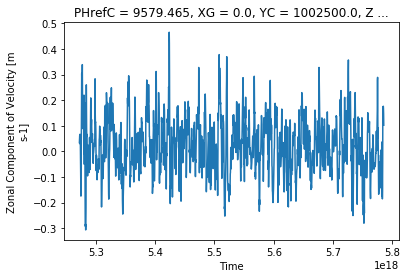

In [6]:
ds_model.U.sel(Z=-1000, XG=0, YC=1000e3, method='nearest').plot()

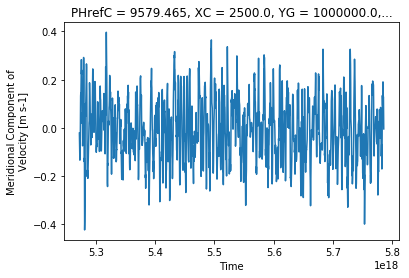

In [7]:
ds_model.V.sel(Z=-1000, XC=0, YG=1000e3, method='nearest').plot()

(array([  2.,   0.,   7.,  11.,  24.,  45.,  64.,  99., 116., 168., 165.,
        164., 183., 182., 140., 143., 136., 108.,  80.,  62.,  35.,  20.,
         15.,   8.,   1.,   1.]),
 array([-0.4       , -0.36923077, -0.33846154, -0.30769231, -0.27692308,
        -0.24615385, -0.21538462, -0.18461538, -0.15384615, -0.12307692,
        -0.09230769, -0.06153846, -0.03076923,  0.        ,  0.03076923,
         0.06153846,  0.09230769,  0.12307692,  0.15384615,  0.18461538,
         0.21538462,  0.24615385,  0.27692308,  0.30769231,  0.33846154,
         0.36923077,  0.4       ]),
 <a list of 26 Patch objects>)

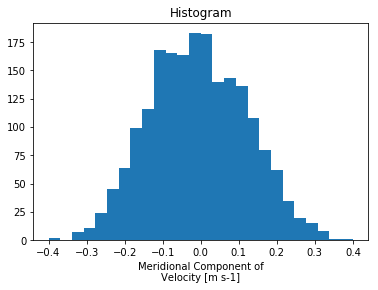

In [12]:
bins = np.linspace(-0.4, 0.4,27)
ds_model.V.sel(Z=-1000, XC=0, YG=1000e3, method='nearest').plot.hist(bins=bins)

In [14]:
ds_model.V.sel(Z=-1000, XC=0, YG=1000e3, method='nearest').mean('time').values

array(-0.00666834, dtype=float32)

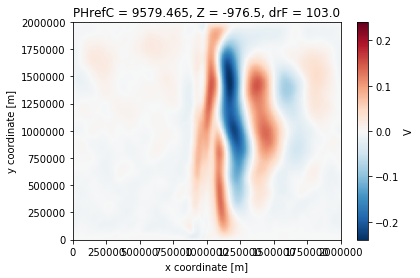

In [15]:
ds_model.V.sel(Z=-1000, method='nearest').mean('time').plot()

In [18]:
Vp =  ds_model.V -  ds_model.V.mean('time')
Cp =  ds_model.PTRACER01 -  ds_model.PTRACER01.mean('time')

In [21]:
grid = Grid(ds_model, periodic='X')

In [22]:
VpCp = grid.interp(Vp, 'Y', boundary='extend') * Cp

In [31]:
VpCp.sel(Z=-1000, XC=0, YC=1000e3, method='nearest').mean('time').values

array(-0.00119943, dtype=float32)

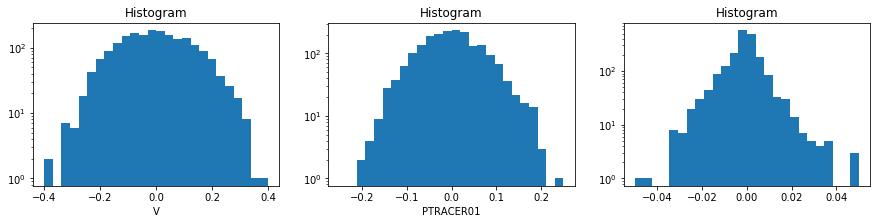

In [28]:
plt.figure(figsize=(15,3))

plt.subplot(131)
bins = np.linspace(-0.4, 0.4,27)
Vp.sel(Z=-1000, XC=0, YG=1000e3, method='nearest').plot.hist(bins=bins);
plt.yscale('log')

plt.subplot(132)
bins = np.linspace(-0.25, 0.25, 27)
Cp.sel(Z=-1000, XC=0, YC=1000e3, method='nearest').plot.hist(bins=bins);
plt.yscale('log')

plt.subplot(133)
bins = np.linspace(-0.05, 0.05,27)
VpCp.sel(Z=-1000, XC=0, YC=1000e3, method='nearest').plot.hist(bins=bins);
plt.yscale('log')


In [43]:
import scipy.stats as sp

In [40]:
print((Vp.sel(Z=-1000, XC=0, YG=1000e3, method='nearest')).mean('time').values, 
      np.median(Vp.sel(Z=-1000, XC=0, YG=1000e3, method='nearest')),  )

-3.371576e-09 -0.003225842


In [45]:
sp.skew(Vp.sel(Z=-1000, XC=0, YG=1000e3, method='nearest'))

0.08585632592439651

In [48]:
sp.kurtosis(Vp.sel(Z=-1000, XC=0, YG=1000e3, method='nearest'))

-0.3671563709815553

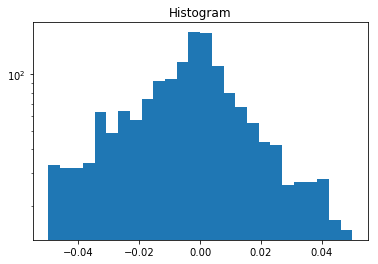

In [49]:
bins = np.linspace(-0.05, 0.05,27)
VpCp.sel(Z=-100, XC=1200e3, YC=1000e3, method='nearest').plot.hist(bins=bins);
plt.yscale('log')

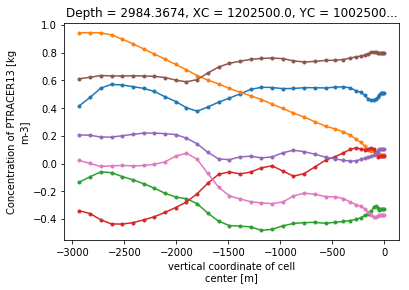

In [62]:
ds_model.PTRACER01.sel(XC=1200e3, YC=1000e3, method='nearest').isel(time=-1).plot(Marker='.')
ds_model.PTRACER03.sel(XC=1200e3, YC=1000e3, method='nearest').isel(time=-1).plot(Marker='.')
ds_model.PTRACER05.sel(XC=1200e3, YC=1000e3, method='nearest').isel(time=-1).plot(Marker='.')
ds_model.PTRACER07.sel(XC=1200e3, YC=1000e3, method='nearest').isel(time=-1).plot(Marker='.')
ds_model.PTRACER09.sel(XC=1200e3, YC=1000e3, method='nearest').isel(time=-1).plot(Marker='.')
ds_model.PTRACER11.sel(XC=1200e3, YC=1000e3, method='nearest').isel(time=-1).plot(Marker='.')
ds_model.PTRACER13.sel(XC=1200e3, YC=1000e3, method='nearest').isel(time=-1).plot(Marker='.')


In [63]:
ds_model

<xarray.Dataset>
Dimensions:              (XC: 400, XG: 400, YC: 400, YG: 400, Z: 40, Zl: 40, Zp1: 41, Zu: 40, layer_1TH_bounds: 43, layer_1TH_center: 42, layer_1TH_interface: 41, time: 1980)
Coordinates:
    Depth                (YC, XC) float32 dask.array<shape=(400, 400), chunksize=(400, 400)>
    PHrefC               (Z) float32 dask.array<shape=(40,), chunksize=(1,)>
    PHrefF               (Zp1) float32 dask.array<shape=(41,), chunksize=(41,)>
  * XC                   (XC) float32 2500.0 7500.0 ... 1992500.0 1997500.0
  * XG                   (XG) float32 0.0 5000.0 10000.0 ... 1990000.0 1995000.0
  * YC                   (YC) float32 2500.0 7500.0 ... 1992500.0 1997500.0
  * YG                   (YG) float32 0.0 5000.0 10000.0 ... 1990000.0 1995000.0
  * Z                    (Z) float32 -5.0 -15.0 -25.0 ... -2830.5 -2933.5
  * Zl                   (Zl) float32 0.0 -10.0 -20.0 ... -2779.0 -2882.0
  * Zp1                  (Zp1) float32 0.0 -10.0 -20.0 ... -2882.0 -2985.0
  * Zu  